# 퍼셉트론의 구조
입력값을 놓고 활성화 함수에 의해 일정한 수준을 넘으면 참, 그렇지 않으면 거짓을 내보내는 회로의 형태다.

아래와 같은 퍼셉트론을 서로 연결하고 조합하여 입력값에 대해 판단하는 것이 신경망의 기본 구조다.

# 은닉층을 여러 겹 쌓은 구조를 인공신경망이라고 부른다.

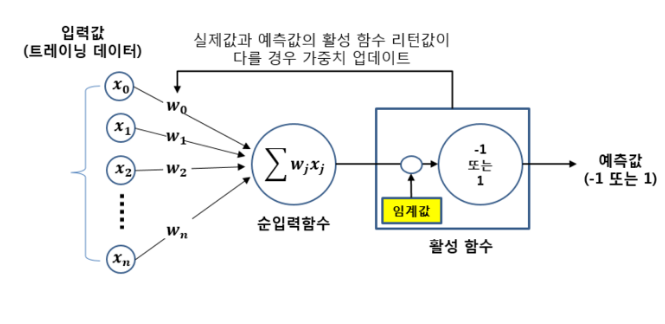

앞에서 봤던 식 $y = ax + b$는
$y = wx + b$(가중합)으로 변경된다.
$w$는 가중치, $b$는 바이어스라고 부른다.

이 가중합을 활성화 함수에 입력하면 1 혹은 0을 판단해서 출력한다.
대표적인 활성화함수가 앞에서 봤던 sigmoid function이다.

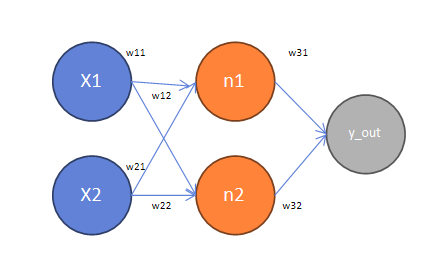

여러개의 퍼셉트론을 사용하여 xor연산을 표현할 수 있다.

여러개의 퍼셉트론을 사용한다는 것은 숨겨진 층 = 은닉층을 만드는 것이라고 생각하면된다. 은닉층은 입력되는 좌표평면을 왜곡하는 결과를 내놓는다.

아래 그림과 같이 처음 입력층에서 각 은닉층으로 가중합이 시그모이드 함수를 통한 값을 보내고, 각 은닉층에서 또 가중합을 구해 활성화함수로 보낸다.

여기서 은닉층에서 가중합이 발생하는 중간 정거장을 node(노드)라고 한다.

두개의 입력을 받고, 두개의 은닉층 노드를 가지고, 출력이 단 하나라면,
은닉층의 각 노드 값은 아래와 같다.
$n_1 = \sigma (x_1w_{11} + x_2w_{21} + b_1)$
$n_2 = \sigma (x_1w_{12} + x_2w_{22} + b_2)$
이고, 출력층에서 다시 가중합을 구하고 다시 시그모이드 함수에 투입한다.
$y_{out} = \sigma (n_1w_{31} + n_2w_{32} + b_3)$

이 때 각 층에서의 가중치와 바이어스를 행렬로 나타내면 다음과 같다.

$W(1) = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix}$
$W(2) = \begin{bmatrix} w_{31} \\ w_{32} \end{bmatrix}$
$B(1) = \begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix}$
$B(2) = \begin{bmatrix} b_3 \end{bmatrix}$

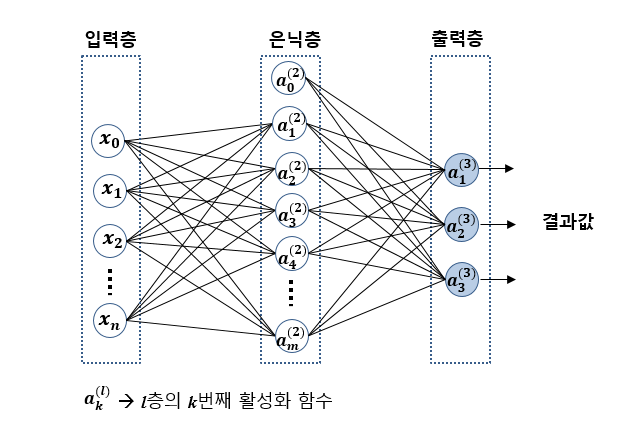

$W(1) = \begin{bmatrix} -2 & 2 \\-2 & 2 \end{bmatrix}$
$W(2) = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$
$B(1) = \begin{bmatrix} 3 \\ -1 \end{bmatrix}$
$B(2) = \begin{bmatrix} -1 \end{bmatrix}$

이렇게 하면, {0,0}{1,0}{0,1}{1,1}입력에 대해 xor과 같은 결과값이 나온다.
즉, 은닉층을 사용하면 xor연산을 표현할 수 있다.

보면 $n_{1}$은 NAND 연산의 결과이고, $n_{2}$은 OR 연산의 결과이다.
그리고 이 두 값에 AND 연산을 하면 XOR 연산이 나온다.

따라서 퍼셉트론을 구성해서 다음과 같이 XOR연산을 표현할 수 있다.

### 참고 자료
https://m.blog.naver.com/samsjang/221030487369
모두의 딥러닝 개정2판

In [1]:
#-*- coding: utf-8 -*-

import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    # ReLu
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트, n1과 같다
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트, n2와 같다.
def OR(x1,x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트. n1과 n2에 대한 가중합과 같다.
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트, n1과 n2에 대한 가중합으로 표현할 수 있다.
# 직접 표를 그려보자.
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))


# x1, x2 값을 번갈아 대입해 가며 최종값 출력
# 현재 스크립트 파일이 실행되는 상태를 파악하기 위해 사용
# __name__은 모듈의 이름이 저장되는 변수.  __name__ 변수를 통해 현재 스크립트 파일이 시작점인지 모듈인지 판단
if __name__ == '__main__':
    for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(x[0], x[1])
        print("입력 값: " + str(x) + " 출력 값: " + str(y))
        

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0
